<ipython-input-1-c9200fa6ce7a>:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['OFNS_DESC'].str.contains(word_to_filter, case=False)]


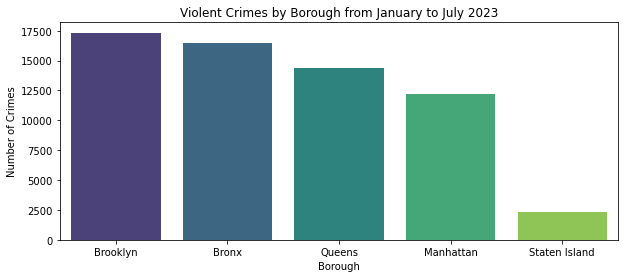

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

df = pd.read_csv("NYPD_Arrest_Data.csv", usecols = ['ARREST_DATE', 'OFNS_DESC', 'ARREST_BORO', 'Latitude', 'Longitude'])
df.fillna(0, inplace=True)
word_to_filter = '(null)'

df = df[~df['OFNS_DESC'].str.contains(word_to_filter, case=False)]
df.to_csv('NYPD_Data.csv', index=False)

column_name = 'OFNS_DESC'

desired_values = ['ARREST_BORO', 'ROBBERY', 'ARSON', 'KIDNAPPING & RELATED OFFENSES', 'KIDNAPPING', 'OFFENSES RELATED TO CHILDREN', 'MURDER & NON-NEGL. MANSLAUGHTE', 'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES','RAPE','SEX CRIMES', 'DANGEROUS WEAPONS']

df = df[df[column_name].isin(desired_values)]

def replace_borough_acronyms(csv_file, ARREST_BORO):
    
    borough_mapping = {'M': 'Manhattan', 'B': 'Bronx', 'Q': 'Queens', 'K': 'Brooklyn', 'S': 'Staten Island'}

    df[ARREST_BORO] = df[ARREST_BORO].replace(borough_mapping)

    df.to_csv(csv_file, index=False)

csv_file_path = 'NYPD_Data.csv'
column_to_replace = 'ARREST_BORO'

replace_borough_acronyms(csv_file_path, column_to_replace)

borough_column = 'ARREST_BORO'

borough_counts = df[borough_column].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='viridis')
plt.title('Violent Crimes by Borough from January to July 2023')
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.show()

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(my_map)

title_html = '<h3 align="center" style="font-size:16px"><b>Violent Crimes in NYC from January to July 2023</b></h3>'
my_map.get_root().html.add_child(folium.Element(title_html))

for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['OFNS_DESC']} ({row['Latitude']}, {row['Longitude']})").add_to(marker_cluster)
my_map

map_filename = "crime_map.html"
my_map.save(map_filename)

IFrame(map_filename, width=625, height=400)